# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [8]:
data = pd.read_excel("ccpp.xlsx","Sheet1")

# Examining the dataset

In [23]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [24]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [26]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [27]:
data.shape

(9568, 5)

In [28]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

# Specifying X and y

In [13]:
X = data.drop(['PE'],axis=1).values
y = data['PE'].values

In [15]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [16]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Splitting dataset into training and testing dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Multiple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

## Instantiating the model

In [20]:
linreg = LinearRegression()

## Training the model

In [22]:
linreg.fit(X_train,y_train)

LinearRegression()

## Predicting the test results

In [29]:
y_pred = linreg.predict(X_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [35]:
linreg.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

# Evaluating the model

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_pred)

0.9304112159477682

# Plotting the results

Text(0.5, 1.0, 'Actual vs Predicted')

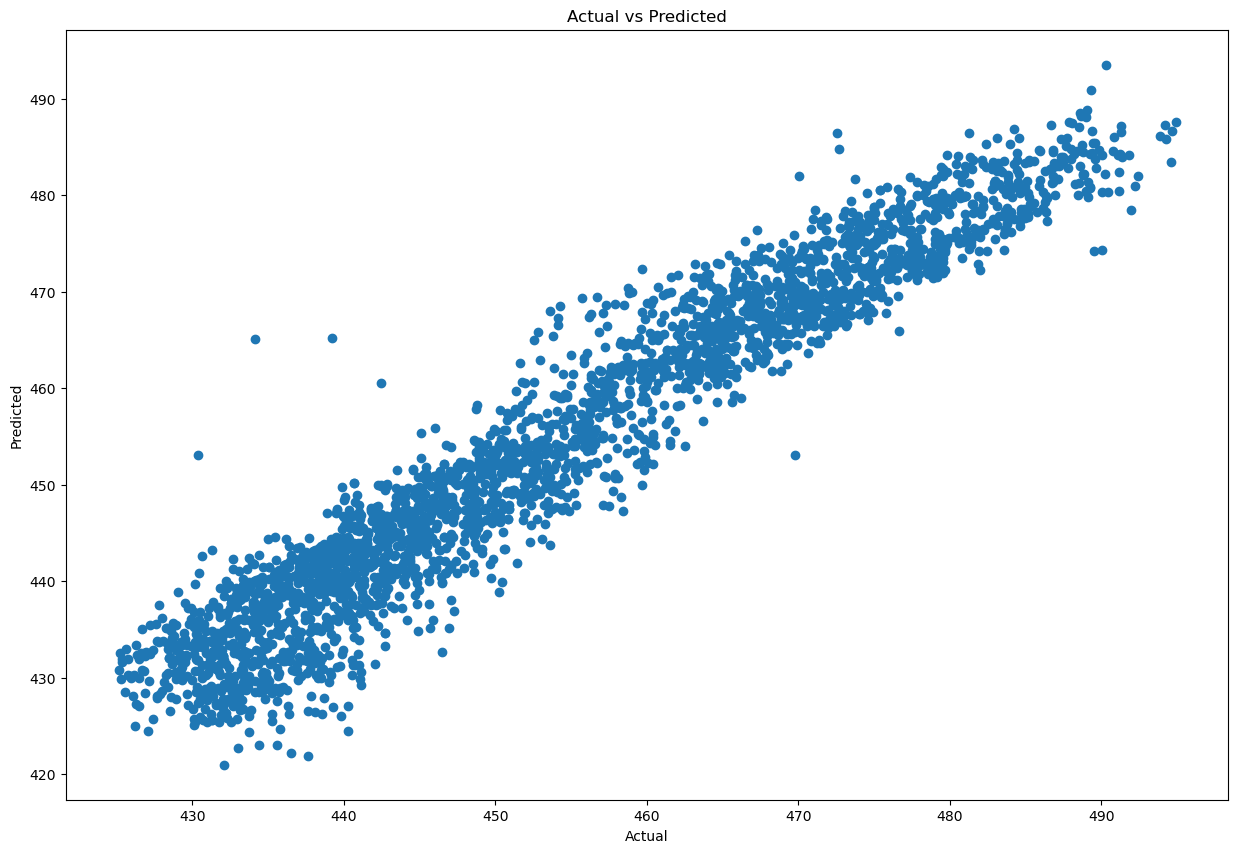

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')

# Printing Predicted Values

In [40]:
pred_y_df = pd.DataFrame({'Actual Values':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Values,Predicted Value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
